# Introduction

In part 1 of this assessment, you will complete several requested SQL queries in order to extract data, analyze, and provide insights from a single provided SQL database. You will also visualize the key results of 3 of these queries. There are also several 'Reflection' questions that ask you to write out a text based answer in the provided markdown cell. Following the guided question and answer section, in part 2 you will explore a second dataset on your own using SQL in order to conduct a preliminary analysis. You will be asked to produce a very short slide presentation highlighting the work you did for this second section.

## Objectives
You will be able to:
- Interpret "word problems" and translate them into SQL queries
- Decide and perform whichever type of JOIN is best for retrieving desired data
- Use GROUP BY statements to apply aggregate functions like COUNT, MAX, MIN, and SUM
- Use the HAVING clause to compare different aggregates
- Write subqueries to decompose complex queries
- Visualize data using matplotlib, seaborn, or pandas
- Choose the correct chart type based on the given data


## Part 1: Guided SQL Queries

### Your Task: Querying a Customer Database

![toy car picture](images/toycars.jpg)


### Business Understanding
Your employer sells wholesale miniature models of products such as classic cars, motorcycles, and planes. They want you to pull several reports on different segments of their past customers, in order to better understand past sales as well as determine which customers will receive promotional material. They are also interested in investigating which products have performed the best, as well as having several smaller asks.

In addition to providing the requested data from the SQL database you have also been asked to create some basic visuals to display some of the more insightful information. It is up to your discretion to choose the correct plot/chart type for the data in question. **Questions that want you to visualize the results will be explicitly marked**.

### Data Understanding
You may remember this database from a previous lab. As a refresher, here's the ERD diagram for this database:

![ERD picture](images/ERD.png)

The queries you are asked to write will become more complex over the course of the lab.



### Getting Started
For this assessment you are expected to make use of both sqlite3 and the Pandas libraries in order to write, execute, and return SQL queries as a Pandas DataFrame. Assign each returned answer as its own explicit variable.

For the visualization piece you are expected to utilize either Pandas, Seaborn, or Matplotlib to create your visuals. Make sure you are providing verbose labels and titles according to the data you are being asked to visualize. Do not worry too much about choosing a 'style' or 'context' instead focus on conveying the requested information correctly.

### Step 1: Connect to Data

In the cell below
- Import the necessary libraries
- Establish a connection to the database data.sqlite

In [2]:
# Replace None with your code
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns

# Create connection to database
conn = sqlite3.connect('data.sqlite')

### Step 2: Limited Edition California Product
The California sales rep team is interested in running promotional material for a new limited edition model they are releasing based on the famous San Francisco Cable Cars. This product will only be available to customer stores based in California and given its high price value they want to first target promotional material to existing California customers with a high credit limit. Upon communicating with the accounting department, a credit limit of over 25,000 is considered to be high. 

Execute a SQl query that returns which customers the sales rep team wants to market to first.

In [7]:
# Replace None with your code
pd.read_sql("""SELECT * FROM customers WHERE state = 'CA' AND creditLimit > 25000; """, conn)
# There do not seem to be any California customers with creditLimit <= 25000
# Since there was no specification on fields or context, we use SELECT * to get them all

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,124,Mini Gifts Distributors Ltd.,Nelson,Susan,4155551450,5677 Strong St.,,San Rafael,CA,97562,USA,1165,210500.00
1,129,Mini Wheels Co.,Murphy,Julie,6505555787,5557 North Pendale Street,,San Francisco,CA,94217,USA,1165,64600.00
2,161,Technics Stores Inc.,Hashimoto,Juri,6505556809,9408 Furth Circle,,Burlingame,CA,94217,USA,1165,84600.00
3,205,Toys4GrownUps.com,Young,Julie,6265557265,78934 Hillside Dr.,,Pasadena,CA,90003,USA,1166,90700.00
4,219,Boards & Toys Co.,Young,Mary,3105552373,4097 Douglas Av.,,Glendale,CA,92561,USA,1166,11000.00
5,239,Collectable Mini Designs Co.,Thompson,Valarie,7605558146,361 Furth Circle,,San Diego,CA,91217,USA,1166,105000.00
6,321,Corporate Gift Ideas Co.,Brown,Julie,6505551386,7734 Strong St.,,San Francisco,CA,94217,USA,1165,105000.00
7,347,"Men 'R' US Retailers, Ltd.",Chandler,Brian,2155554369,6047 Douglas Av.,,Los Angeles,CA,91003,USA,1166,57700.00
8,450,The Sharp Gifts Warehouse,Frick,Sue,4085553659,3086 Ingle Ln.,,San Jose,CA,94217,USA,1165,77600.00
9,475,West Coast Collectables Co.,Thompson,Steve,3105553722,3675 Furth Circle,,Burbank,CA,94019,USA,1166,55400.00


### Step 3: International Collectable Campaign

The international sales rep team has reached out to you to help them identify partners for a 'Collectable' marketing campaign that highlights the potential collectors value in purchasing these model kits. They want to try and promote a 'collect them all' mentality. The team had a great idea to partner with any of their international customers (non-US) who have "Collect" in their name as a tie in to the larger theme.

Execute a SQL that returns the customers in question.

In [8]:
# Replace None with your code
pd.read_sql("""SELECT * FROM customers WHERE country != 'USA' AND customerName LIKE "%Collect%";""", conn)
# SQLite LIKE is case-insensitive
# Again, we use * since no fields were specified. 

,customerNumber,customerName,contactLastName,contactFirstName,phone,addressLine1,addressLine2,city,state,postalCode,country,salesRepEmployeeNumber,creditLimit
0,114,"Australian Collectors, Co.",Ferguson,Peter,03 9520 4555,636 St Kilda Road,Level 3,Melbourne,Victoria,3004,Australia,1611,117300.00
1,189,"Clover Collections, Co.",Cassidy,Dean,+353 1862 1555,25 Maiden Lane,Floor No. 4,Dublin,,2,Ireland,1504,69400.00
2,201,"UK Collectables, Ltd.",Devon,Elizabeth,(171) 555-2282,"12, Berkeley Gardens Blvd",,Liverpool,,WX1 6LT,UK,1501,92700.00
3,211,"King Kong Collectables, Co.",Gao,Mike,+852 2251 1555,Bank of China Tower,1 Garden Road,Central Hong Kong,,,Hong Kong,1621,58600.00
4,227,Heintze Collectables,Ibsen,Palle,86 21 3555,Smagsloget 45,,Århus,,8200,Denmark,1401,120800.00
5,260,"Royal Canadian Collectables, Ltd.",Lincoln,Elizabeth,(604) 555-4555,23 Tsawassen Blvd.,,Tsawassen,BC,T2F 8M4,Canada,1323,89600.00
6,293,BG&E Collectables,Harrison,Ed,+41 26 425 50 01,Rte des Arsenaux 41,,Fribourg,,1700,Switzerland,,0.00
7,353,Reims Collectables,Henriot,Paul,26.47.1555,59 rue de l'Abbaye,,Reims,,51100,France,1337,81100.00
8,376,Precious Collectables,Urs,Braun,0452-076555,Hauptstr. 29,,Bern,,3012,Switzerland,1702,0.00
9,382,Salzburg Collectables,Pipps,Georg,6562-9555,Geislweg 14,,Salzburg,,5020,Austria,1401,71700.00


## Reflection Question:

Describe the WHERE clause you used in the above query to a non-technical manager who wants to be ensured that you are properly filtering and only selecting the requested data. How is the operator and conditional expression you are using acting to accomplish this?

### Filter Explanation

First, since we are only interested in international customers, we include only stores that are NOT in the US - in other words, the whole rest of the world. (country != 'USA' -> country is NOT equal to 'USA')

Next, we look for stores that contain Collect in them somewhere - this could be Collects-R-US, Scandinavian Collectors Association, and so on. This will allow us to target stores for our Collectable campaign. (customerName LIKE "%Collect%" -> the customer name field contains Collect)

### Step 4: USA Credit and Inventory Policy - Visual Required
The USA based product team is planning to adjust its credit policies and inventory allocation strategy based on the average credit limit of its customers. They would like to target this strategy at a state level with several goals in mind. 
1. Optimize inventory distribution:
    - States with higher average credit limits might be able to place larger orders, justifying priority in inventory allocation.
    - This could help ensure that states with more purchasing power always have products in stock.
2. Tailor credit policies:
    - Adjust credit limits for new customers based on the state average.
    - Identify states where they might be too conservative or too liberal with credit limits.
3. Target marketing and sales efforts:
    - Focus promotional campaigns on states with higher credit limits, potentially leading to larger orders.
    - Develop strategies to increase sales in states with lower average credit limits.

Execute a SQl query that returns the information required to address this ask.

In [35]:
# Replace None with your code
# It is not specified whether we are talking about US states, so we will keep all "states" identified in the data

acl_df = pd.read_sql("""
    SELECT state, ROUND(AVG(creditLimit)) as "Average Credit Limit"
    FROM customers 
    WHERE country = 'USA'
    GROUP BY state
    ORDER BY AVG(creditLimit) DESC;""", conn)
# We exclude stores with no listed state
# We round the average to increase readability in the table

df

,state,Average Credit Limit
0,NH,114200.0
1,NY,89967.0
2,PA,84767.0
3,CA,83855.0
4,NV,71800.0
5,MA,70756.0
6,CT,57350.0
7,NJ,43000.0


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

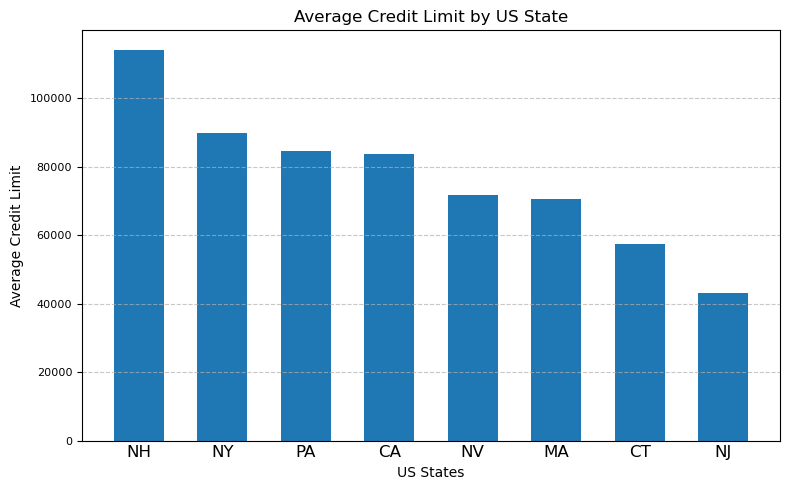

In [38]:
# Replace None with your visual code
# Produce a visual to represent the average credit limit by state
# Visualizations: Since there are only 8 states, we can represent them in a bar graph 
plt.figure(figsize=(8, 5))
plt.bar(acl_df["state"], acl_df["Average Credit Limit"], width=0.6)
plt.xlabel("US States")
plt.ylabel("Average Credit Limit")
plt.title("Average Credit Limit by US State")
plt.xticks(fontsize=12)
plt.tick_params(axis='x', which='both', length=0)
plt.yticks(fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

### Step 5: Top Customers - Visual Required
The company is approaching its 10 year anniversary and wants to acknowledge and thank its top customers with personalized communication. They have asked you to determine the top 10 customers based on the total amount of payments made, making sure to return the customer name for clarity. 

Execute a SQl query that returns the information required to address this ask.


In [40]:
# Replace None with your code
# Interpreting  total amount of payments made as sum rather than count
# ("amount in dollars" vs "number of payments")
top5c_df = pd.read_sql("""
    SELECT customerName, SUM(amount) AS "Total Payment Amount"
    FROM customers
    JOIN payments on payments.customerNumber = customers.customerNumber
    GROUP BY customerName
    ORDER BY SUM(amount) DESC
    LIMIT 10;""", conn)
top5c_df

,customerName,Total Payment Amount
0,Euro+ Shopping Channel,715738.98
1,Mini Gifts Distributors Ltd.,584188.24
2,"Australian Collectors, Co.",180585.07
3,Muscle Machine Inc,177913.95
4,"Dragon Souveniers, Ltd.",156251.03
5,"Down Under Souveniers, Inc",154622.08
6,"AV Stores, Co.",148410.09
7,"Anna's Decorations, Ltd",137034.22
8,Corporate Gift Ideas Co.,132340.78
9,"Saveley & Henriot, Co.",130305.35


Once you have the information returned in a dataframe, select an appropriate visualization to represent this data. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

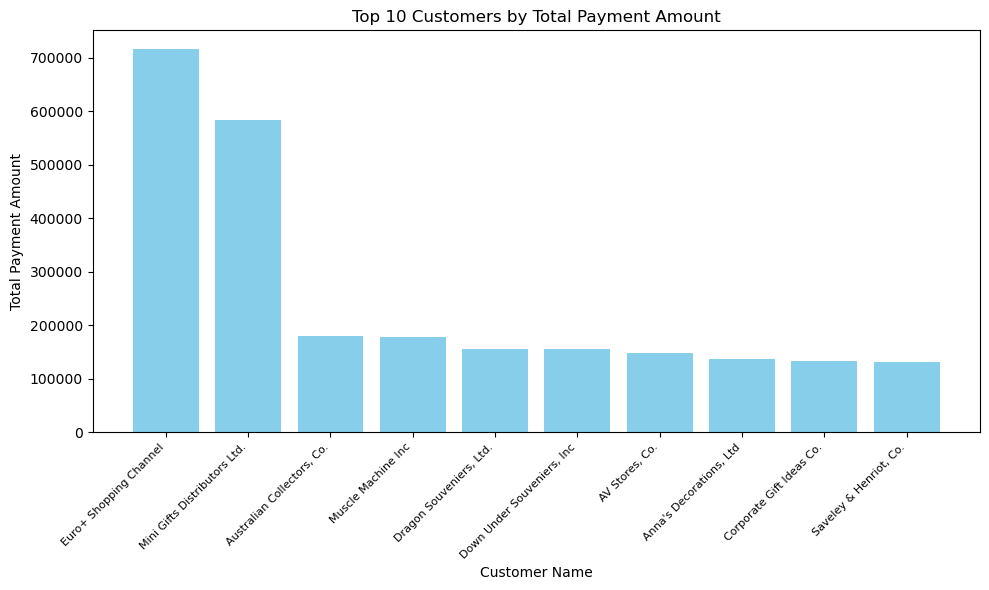

In [50]:
# Replace None with your visual code
# Produce a visual to represent the top ten customers in terms of total payments
plt.figure(figsize=(10, 6))
plt.bar(top5c_df["customerName"], top5c_df["Total Payment Amount"], color="skyblue")
plt.xlabel("Customer Name")
plt.ylabel("Total Payment Amount")
plt.title("Top 10 Customers by Total Payment Amount")
plt.xticks(rotation=45, ha="right", fontsize=8)
plt.tight_layout()
plt.show()

### Step 6: Top Customer + Product Quantities
The product team is running an analysis on popular and common products sold to each customer in order to try and determine what new products they should be looking at to include in their catalog. This data will also be used by individual sales reps to recommend similar products to each customer next time they place an order. 

They have asked you to query information, for each customer, about any product they have purchased 10 or more units of. In addition they would like the full set of data to be sorted in ascending order by the total amount purchased.

Execute a SQl query that returns the information required to address this ask.

Hint: For this one, you'll need to make use of HAVING, GROUP BY, and ORDER BY — make sure you get the order of them correct!

In [41]:
# Replace None with you code
pcq_df = pd.read_sql("""
    SELECT customerName, products.productCode, SUM(quantityOrdered) FROM customers
    INNER JOIN orders ON orders.customerNumber = customers.customerNumber
    INNER JOIN orderdetails ON orderdetails.orderNumber = orders.orderNumber
    INNER JOIN products ON products.productCode = orderdetails.productCode
    GROUP BY customerName, products.productCode
    HAVING SUM(quantityOrdered >= 10)
    ORDER BY SUM(quantityOrdered)
    """, conn)
pcq_df

,customerName,productCode,SUM(quantityOrdered)
0,The Sharp Gifts Warehouse,S18_4409,6
1,"Extreme Desk Decorations, Ltd",S24_4620,10
2,Petit Auto,S18_2949,10
3,La Rochelle Gifts,S32_2509,11
4,Tekni Collectables Inc.,S700_1691,11
...,...,...,...
2527,Euro+ Shopping Channel,S24_3432,174
2528,Euro+ Shopping Channel,S12_4473,183
2529,Euro+ Shopping Channel,S24_1444,197
2530,Euro+ Shopping Channel,S24_2840,245


### Step 7: Product Analysis - Visual Required

The product team is looking into the demand across its different product lines. They are conducting a comprehensive review of its product portfolio and inventory management strategies. You have been asked to query data pertaining to each different product line, that contains the total quantity ordered and the total number of products for each respective product line. By examining the number of products and total quantity ordered for each product line, the company aims to:
1. Optimize product mix:
    - Identify which product lines have the most diverse offerings (high number of products)
    - Determine which lines are most popular (high total quantity ordered)
    - Compare if lines with more products necessarily lead to more orders
2. Improve inventory management:
    - Adjust stock levels based on the popularity of each product line
    - Identify potential overstocking in lines with low order quantities
    - Ensure adequate variety in high-performing product lines
3. Adjust marketing strategy:
    - Focus promotional efforts on product lines with high potential (many products but lower order quantities)
    - Capitalize on the popularity of high-performing lines in marketing campaigns
4. Advise Product development:
    - Invest in expanding product ranges for lines with high order quantities
    - Consider phasing out or revamping product lines with low numbers of products and low order quantities

Hint: Think about how you can and might have to utilize SQL DISTINCT statement

Execute a SQl query that returns the information required to address this ask.

In [45]:
# Replace None with your code
productlines_df = pd.read_sql("""
    SELECT productLine, SUM(quantityOrdered) AS "total_ordered", COUNT(*) as "num_products" from products
    INNER JOIN orderdetails
    ON orderdetails.productCode = products.productCode
    GROUP BY productLine""", conn)

productlines_df
# test = pd.read_sql("Select productCode from products where productLine = 'Trains'", conn)
# test

,productLine,total_ordered,num_products
0,Classic Cars,35582,1010
1,Motorcycles,12778,359
2,Planes,11872,336
3,Ships,8532,245
4,Trains,2818,81
5,Trucks and Buses,11001,308
6,Vintage Cars,22933,657


Once you have the information returned in a dataframe, select an appropriate visualization to represent the relationship between total quantity ordered and the number of products in order to perform a preliminary investigation into the question of if more products lead to more orders. You are welcome to utilize matplotlib, seaborn, or pandas plotting to produce your visual. Ensure that it has a verbose title and axis labels!

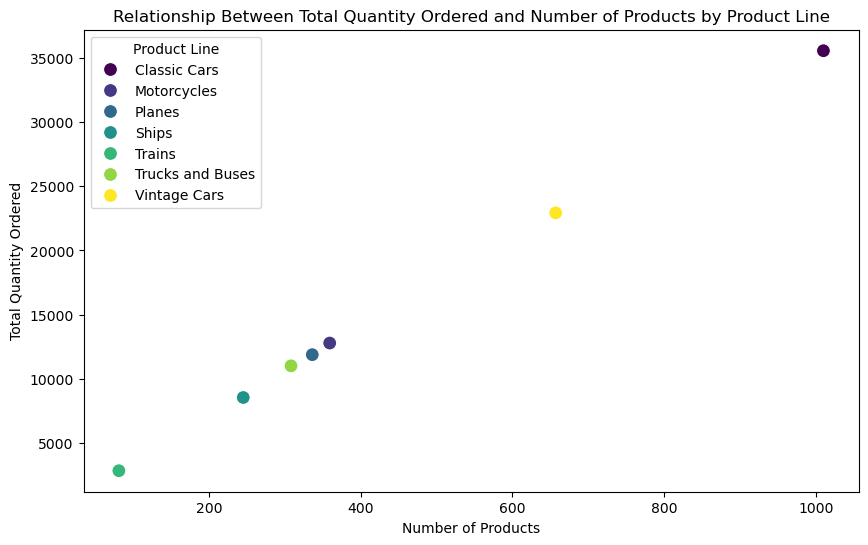

In [80]:
# Replace None with your visual code
# Produce a visual to represent the the relation between number of products and the total amount ordered

plt.figure(figsize=(10, 6))

scatter = sns.scatterplot(
    x="num_products",
    y="total_ordered",
    hue=productlines_df.index,
    data=productlines_df,
    palette="viridis", s=100)

# Create legend handles and labels
handles, labels = scatter.get_legend_handles_labels()

# Map index to product line names for legend labels
legend_labels = []
for label in labels:
    legend_labels.append(productlines_df["productLine"][int(label)])

plt.legend(handles, legend_labels, title="Product Line")
plt.title("Relationship Between Total Quantity Ordered and Number of Products by Product Line")
plt.xlabel("Number of Products")
plt.ylabel("Total Quantity Ordered")
plt.show()

## Reflection Question:

Please explain your choice in the type of visual you used in order to highlight and represent the data from the above query. In a non-technical manner explain why that chart type makes sense for the information being conveyed. What does this visual convey in the context of the question it was asked for?

### Strong Linear Relationship

The scatter plot shows an almost perfect linear relationship between the number of products for a given product line and the number of products ordered. It's not surprising that there would be such a relationship. Developing a new product takes work, and producers will only do that if they think there's a market. However, we should be cautious not to infer a causality here that if we get more products we can expect corresponding growth (about 35:1) in order quantity. The products we're not carrying may be unpopular, for example.

### Step 8: Remote Offices
Upper management is considering a shift to hybrid and remote work for certain locations and roles. They have tasked you with providing them data about employees who work in any office that has fewer than 5 total employees so they can better understand how to support those employees remotely when offices are shut down. 

Be sure to include information about the employees job and supervisor so management can adjust everyone to remote work properly.

Hint: Utilize a subquery to find the relevant offices

Execute a SQl query that returns the information required to address this ask.

In [97]:
# Replace None with your code
# Use a subquery to get the offices with fewer than 5 employees
# (offices 2, 3, 5, 6, 7)
# Self-join to get supervisor names
remote = pd.read_sql("""
    SELECT e.firstName, e.lastName, e.jobTitle, e.officeCode,
        s.firstName AS supervisorFirstName,
        s.lastName AS supervisorLastName
    FROM employees e
    LEFT JOIN employees s ON e.reportsTo = s.employeeNumber
    WHERE e.officeCode IN(
        SELECT officeCode FROM employees
        GROUP BY officeCode
        HAVING COUNT(*) < 5
    )
    """, conn)
remote

,firstName,lastName,jobTitle,officeCode,supervisorFirstName,supervisorLastName
0,William,Patterson,Sales Manager (APAC),6,Mary,Patterson
1,Julie,Firrelli,Sales Rep,2,Anthony,Bow
2,Steve,Patterson,Sales Rep,2,Anthony,Bow
3,Foon Yue,Tseng,Sales Rep,3,Anthony,Bow
4,George,Vanauf,Sales Rep,3,Anthony,Bow
5,Larry,Bott,Sales Rep,7,Gerard,Bondur
6,Barry,Jones,Sales Rep,7,Gerard,Bondur
7,Andy,Fixter,Sales Rep,6,William,Patterson
8,Peter,Marsh,Sales Rep,6,William,Patterson
9,Tom,King,Sales Rep,6,William,Patterson


## Reflection Question:

Describe how you decided on the subquery that you used in the query above? This answer can be technically in nature, describing your thought process in how the main query is utilizing the subquery to return the correct data.

### Subquery

To identify employees in small offices, I needed a list of officeCode values representing those offices. A subquery efficiently generated this list by grouping employees by officeCode and filtering for counts less than 5 using HAVING. The main query then used this list to select the relevant employee records.

### Step 9: Close the Connection

Now that you are finished executing your queries and retrieving the required information you always want to make sure to close the connection to your database.

In [3]:
# Replace None with your code
conn.close()

### End of Guided Section
In this initial portion of the assessment, you produced several data queries and visualizations for a model company, mainly focused around its customer and product data. You wrote and engineered specific SQL queries to address pertinent questions and asks from the company. Along the way, you utilized many of the major concepts and keywords associated with SQL SELECT queries: FROM, WHERE, GROUP BY, HAVING, ORDER BY, JOIN, SUM, COUNT, and AVG.

## Part 2: Exploratory Analysis with SQL
In this open-ended exploratory section, you will analyze real-world data from the movie industry. As a data analyst, you have the freedom to investigate questions and topics that intrigue you within this dataset. The database schema and Entity-Relationship Diagram (ERD) are provided below for your reference. A general overview and instructions are also provided below.

In [4]:
# Run this cell without changes
import zipfile
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
zip_file_path = 'im.db.zip'
extract_to_path = './'

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

# Connection
conn4 = sqlite3.connect('im.db')

# Schema
schema_df = pd.read_sql("""
SElECT * FROM sqlite_master                        
""", conn4)
schema_df

,type,name,tbl_name,rootpage,sql
0,table,movie_basics,movie_basics,2,"CREATE TABLE ""movie_basics"" (\n""movie_id"" TEXT..."
1,table,directors,directors,3,"CREATE TABLE ""directors"" (\n""movie_id"" TEXT,\n..."
2,table,known_for,known_for,4,"CREATE TABLE ""known_for"" (\n""person_id"" TEXT,\..."
3,table,movie_akas,movie_akas,5,"CREATE TABLE ""movie_akas"" (\n""movie_id"" TEXT,\..."
4,table,movie_ratings,movie_ratings,6,"CREATE TABLE ""movie_ratings"" (\n""movie_id"" TEX..."
5,table,persons,persons,7,"CREATE TABLE ""persons"" (\n""person_id"" TEXT,\n ..."
6,table,principals,principals,8,"CREATE TABLE ""principals"" (\n""movie_id"" TEXT,\..."
7,table,writers,writers,9,"CREATE TABLE ""writers"" (\n""movie_id"" TEXT,\n ..."


## The Data

![movie ERD](images/movie_data_erd.jpeg)
### Database Content:

- Source: IMDB
- Time Range: Movies released between 2010 and 2019
- Note: Exclude any movies with a start_year after 2019 as this data is not current or accurate

Available Data Categories:
- Genre
- Runtime
- Personnel (writers, directors, actors)
- Movie ratings

### Objectives:

Initial Exploration:
- Use SQL in combination with Pandas to explore the database
- Identify interesting trends, patterns, or relationships in the data

Business Question Formulation:
- Develop at least one substantial business question for deeper analysis
- Ensure the question is relevant, specific, and can be addressed with the available data

Data Cleaning Assessment:
- Identify potential data cleaning tasks necessary for your deeper analysis
- Note: You are not required to perform the cleaning, only to recognize and list the necessary tasks

Null Value Handling:
- Be aware that the dataset contains null values in certain fields
- Exclude these null values from your exploration
- Do not attempt to input or fill in missing information

### Deliverables:

You need to produce a short slide presentation (3-5 slides) that highlights the three key deliverables below. Utilize a data visualization to support the second deliverable.

1. A summary of your initial data exploration findings
    - Can be bulleted or sentence form
2. At least one well-formulated business question for further analysis
    - Should stem from a relevant trend or pattern your initial exploration identified
3. A list of potential data cleaning tasks identified during your exploration
    - This can and should include things like data normalization/standardization and null handling

Tips for Success:

Begin with broad exploratory queries to understand the data's scope and content. Then focus on honing in on interesting relationships between different data categories. Consider industry trends, audience preferences, or financial aspects when formulating your business question. Pay attention to data quality issues, inconsistencies, or limitations that might affect your analysis. Remember, the goal is to demonstrate your analytical thinking and ability to derive meaningful insights from complex datasets. Good luck with your exploration!

NOTE: You do not need to explore every aspect of this database. Find something that you think is interesting or relevant about the data and focus your exploration there.

In [5]:
# Begin your code here
# Directors table notes
# 109,253 distinct directors
# 291,174 rows
# 140,417 movie ids
# Create single_director_movies table and index
conn4.execute("""DELETE FROM movie_basics
WHERE start_year >= 2020;""")
conn4.execute("""
    CREATE TABLE IF NOT EXISTS single_director_movies AS
    SELECT movie_id
    FROM directors
    GROUP BY movie_id
    HAVING COUNT(*) = 1;
""")

conn4.execute("""
    CREATE INDEX IF NOT EXISTS idx_single_director_movies_movie_id ON single_director_movies(movie_id);
""")

# Create Indexes for other tables.
conn4.execute("""CREATE INDEX IF NOT EXISTS idx_directors_movie_id ON directors (movie_id);""")
conn4.execute("""CREATE INDEX IF NOT EXISTS idx_directors_person_id ON directors (person_id);""")
conn4.execute("""CREATE INDEX IF NOT EXISTS idx_movie_ratings_movie_id ON movie_ratings (movie_id);""")
conn4.execute("""CREATE INDEX IF NOT EXISTS idx_persons_person_id ON persons (person_id);""")

# Execute the main query using Pandas
solodir_spread_df = pd.read_sql("""
    WITH director_movie_counts AS (
        SELECT d.person_id, COUNT(d.movie_id) AS movie_count
        FROM directors d JOIN single_director_movies sdm ON d.movie_id = sdm.movie_id
        GROUP BY d.person_id HAVING COUNT(d.movie_id) >= 3
    )
    SELECT d.person_id, MAX(r.averagerating) - MIN(r.averagerating) AS rating_spread
    FROM directors d JOIN movie_ratings r ON d.movie_id = r.movie_id
    JOIN single_director_movies sdm ON d.movie_id = sdm.movie_id
    JOIN director_movie_counts dmc ON d.person_id = dmc.person_id
    GROUP BY d.person_id
    ORDER BY rating_spread
""", conn4)

solodir_spread_df

,person_id,rating_spread
0,nm0000647,0.0
1,nm0000937,0.0
2,nm0002306,0.0
3,nm0002547,0.0
4,nm0003577,0.0
...,...,...
3716,nm3047456,6.3
3717,nm1512437,6.3
3718,nm0000490,6.4
3719,nm0513771,6.7


In [33]:
test_df = pd.read_sql("""
    WITH single_director_movies AS (
        SELECT movie_id FROM directors GROUP BY movie_id HAVING COUNT(*) = 1
    ), director_movie_counts AS (
        SELECT d.person_id, COUNT(d.movie_id) AS movie_count
        FROM directors d JOIN single_director_movies sdm ON d.movie_id = sdm.movie_id
        GROUP BY d.person_id HAVING COUNT(d.movie_id) >= 3
    ), director_rated_movie_counts AS (
        SELECT d.person_id, COUNT(r.movie_id) AS rated_movie_count
        FROM directors d JOIN movie_ratings r ON d.movie_id = r.movie_id
        JOIN single_director_movies sdm ON d.movie_id = sdm.movie_id
        JOIN director_movie_counts dmc ON d.person_id = dmc.person_id
        GROUP BY d.person_id
    )
    SELECT d.person_id, MAX(r.averagerating) - MIN(r.averagerating) AS rating_spread
    FROM directors d JOIN movie_ratings r ON d.movie_id = r.movie_id
    JOIN single_director_movies sdm ON d.movie_id = sdm.movie_id
    JOIN director_movie_counts dmc ON d.person_id = dmc.person_id
    JOIN director_rated_movie_counts drmc on d.person_id = drmc.person_id
    WHERE rated_movie_count >= 10
    GROUP BY d.person_id
    ORDER BY rating_spread
    """, conn4)
test_df

,person_id,rating_spread
0,nm0393254,0.8
1,nm0316795,1.1
2,nm1067862,1.5
3,nm1988829,1.5
4,nm1066739,1.8
5,nm3163561,1.9
6,nm0043335,2.1
7,nm3359146,2.1
8,nm0946995,2.2
9,nm7702935,2.2


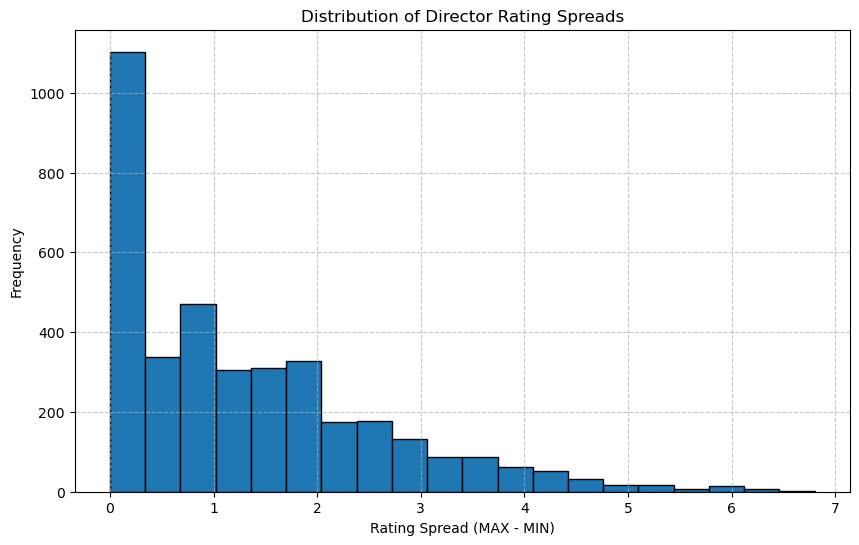

In [34]:
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
plt.hist(solodir_spread_df['rating_spread'], bins=20, edgecolor='black') # adjust bins as needed
plt.title('Distribution of Director Rating Spreads')
plt.xlabel('Rating Spread (MAX - MIN)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [37]:
outofrange = pd.read_sql("""
    SELECT movie_id, start_year
FROM movie_basics
WHERE start_year < 2010 OR start_year > 2019;""", conn4)
outofrange

,movie_id,start_year


In [12]:
# 1086 "genres" counting multi-genres
# 25 "single" genres
genre_exam = pd.read_sql("""SELECT genres, COUNT(*) from movie_basics WHERE
    genres IS NOT NULL AND genres != '' 
    AND genres NOT LIKE '%,%' 
    GROUP BY genres ORDER BY count(*) DESC""", conn4)
genre_exam

,genres,COUNT(*)
0,Documentary,32185
1,Drama,21486
2,Comedy,9177
3,Horror,4372
4,Thriller,3046
5,Action,2219
6,Romance,1454
7,Family,939
8,Animation,828
9,Crime,720


In [14]:
runtimes_bygenre_df = pd.read_sql("""
    SELECT genres,
        ROUND(AVG(runtime_minutes)) AS average_runtime
    FROM movie_basics
    WHERE
        genres IS NOT NULL AND 
        genres != '' AND INSTR(genres, ',') = 0 AND
        runtime_minutes IS NOT NULL
    GROUP BY genres
    HAVING COUNT(*) >= 1000
    ORDER BY average_runtime DESC;""", conn4)
runtimes_bygenre_df

,genres,average_runtime
0,Action,102.0
1,Drama,95.0
2,Thriller,93.0
3,Comedy,93.0
4,Horror,85.0
5,Documentary,75.0


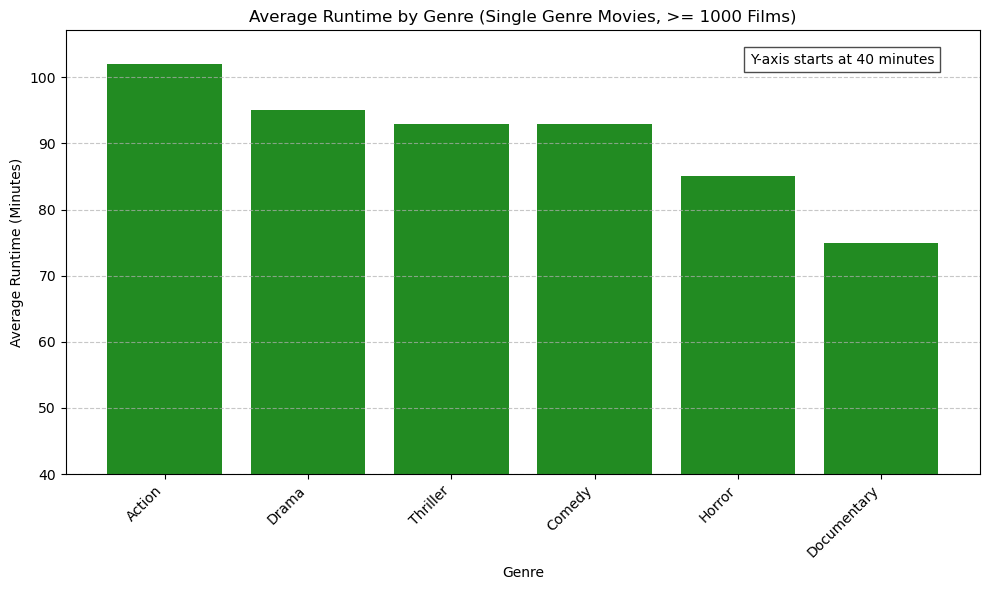

In [18]:
plt.figure(figsize=(10, 6))
plt.bar(runtimes_bygenre_df['genres'], runtimes_bygenre_df['average_runtime'], color='forestgreen')
plt.title('Average Runtime by Genre (Single Genre Movies, >= 1000 Films)')
plt.xlabel('Genre')
plt.ylabel('Average Runtime (Minutes)')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.ylim(bottom=40)
plt.text(0.95, 0.95, 'Y-axis starts at 40 minutes', transform=plt.gca().transAxes,
         fontsize=10, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='white', alpha=0.7))
plt.show()

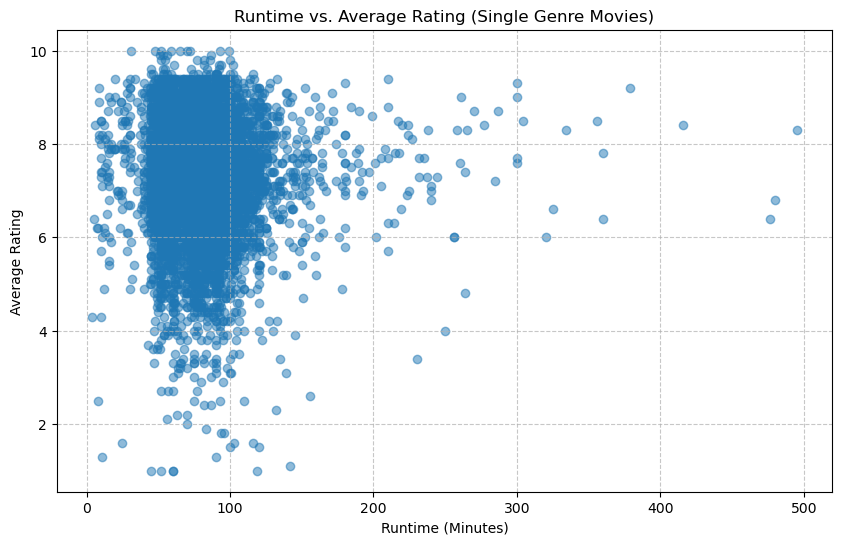

In [23]:
runtime_rating_df = pd.read_sql("""
    SELECT
        mb.runtime_minutes,
        mr.averagerating
    FROM
        movie_basics mb
    JOIN
        movie_ratings mr ON mb.movie_id = mr.movie_id
    WHERE
        mb.genres IS NOT NULL AND mb.genres != '' AND INSTR(mb.genres, ',') = 0 AND
        mb.runtime_minutes IS NOT NULL AND mr.averagerating IS NOT NULL AND
        mb.runtime_minutes < 500
        AND mb.genres = 'Documentary'
""", conn4)

plt.figure(figsize=(10, 6))
plt.scatter(runtime_rating_df['runtime_minutes'], runtime_rating_df['averagerating'], alpha=0.5)
plt.title('Runtime vs. Average Rating (Single Genre Movies)')
plt.xlabel('Runtime (Minutes)')
plt.ylabel('Average Rating')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [32]:
comedy_actor_ratings_df = pd.read_sql("""
    WITH comedy_actor_ratings AS (
        SELECT p.person_id, AVG(mr.averagerating) AS average_rating
        FROM principals p JOIN movie_ratings mr ON p.movie_id = mr.movie_id
        JOIN movie_basics mb ON p.movie_id = mb.movie_id
        WHERE p.category = 'actor' AND mb.genres LIKE '%Comedy%'
        GROUP BY p.person_id
        HAVING COUNT(mr.movie_id) >= 3 AND MIN(mr.numvotes) >= 1000
    )
    SELECT pe.primary_name, car.average_rating
    FROM comedy_actor_ratings car JOIN persons pe ON car.person_id = pe.person_id
    ORDER BY car.average_rating DESC
    LIMIT 10;
""", conn4)
comedy_actor_ratings_df

,primary_name,average_rating
0,Rakshit Shetty,8.266667
1,Tomokazu Sugita,7.933333
2,Brad Pitt,7.700000
3,Humayun Saeed,7.666667
4,Ryan Gosling,7.650000
5,Taron Egerton,7.300000
6,Benjamin Bratt,7.233333
7,Javed Sheikh,7.166667
8,Zachary Levi,7.166667
9,Tom Hiddleston,7.100000
